In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# increase the maximum number of rows and columns displayed
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 1000)

# Load the data in a dataframe
Data=pd.read_csv('mxmh_survey_results.csv')


# Data Exploration and Preparation

In [3]:
# Print Dataframe
Data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
# Look at the columns
Data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [5]:
Data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [6]:
# check if the data is balanced
Data['Music effects'].value_counts(normalize=True).round(2)

Improve      0.74
No effect    0.23
Worsen       0.02
Name: Music effects, dtype: float64

In [7]:
# No. of rows present within the data
len(Data)

736

In [8]:
# Null values check
Data.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [9]:
# Print out all columns with missing values
for i in Data.columns:
    if Data[i].isna().sum()>0:
        print(i,'(',Data[i].dtype,')',':',Data[i].isna().sum())

Age ( float64 ) : 1
Primary streaming service ( object ) : 1
While working ( object ) : 3
Instrumentalist ( object ) : 4
Composer ( object ) : 1
Foreign languages ( object ) : 4
BPM ( float64 ) : 107
Music effects ( object ) : 8


In [10]:
# Let's apply mean imputation for BPM since the % of missing values is high
Data['BPM'] = Data['BPM'].fillna(Data['BPM'].mean())

# Replacing nan with 0 for AGE
Data['Age']=Data['Age'].fillna(0)

# Run it again : Print out all columns with missing values
for i in Data.columns:
    if Data[i].isna().sum()>0:
        print(i,'(',Data[i].dtype,')',':',Data[i].isna().sum())

Primary streaming service ( object ) : 1
While working ( object ) : 3
Instrumentalist ( object ) : 4
Composer ( object ) : 1
Foreign languages ( object ) : 4
Music effects ( object ) : 8


In [11]:
# Since the % of null values ain't significant, I will go ahead and drop them

Data=Data.dropna()

#Final check for null values
Data.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [12]:
# From 736 rows to 719 rows after dropping na
len(Data)

719

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 2 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     719 non-null    object 
 1   Age                           719 non-null    float64
 2   Primary streaming service     719 non-null    object 
 3   Hours per day                 719 non-null    float64
 4   While working                 719 non-null    object 
 5   Instrumentalist               719 non-null    object 
 6   Composer                      719 non-null    object 
 7   Fav genre                     719 non-null    object 
 8   Exploratory                   719 non-null    object 
 9   Foreign languages             719 non-null    object 
 10  BPM                           719 non-null    float64
 11  Frequency [Classical]         719 non-null    object 
 12  Frequency [Country]           719 non-null    object 
 13  Frequ

In [14]:
# Convert "timestamp" column to Timestamp Datatype
Data['Timestamp'] = pd.to_datetime(Data['Timestamp'])
Data['Timestamp'].dtype


dtype('<M8[ns]')

In [15]:
Categorical_variables=[]
# Get value counts of only categorical data
for i in Data.columns:
    if Data[i].dtype==object:
       
        print(Data[i].value_counts())
        Categorical_variables.append(i)
        print()

Spotify                              451
YouTube Music                         90
I do not use a streaming service.     69
Apple Music                           50
Other streaming service               49
Pandora                               10
Name: Primary streaming service, dtype: int64

Yes    568
No     151
Name: While working, dtype: int64

No     490
Yes    229
Name: Instrumentalist, dtype: int64

No     595
Yes    124
Name: Composer, dtype: int64

Rock                184
Pop                 114
Metal                87
Classical            51
Video game music     43
EDM                  36
R&B                  35
Hip hop              35
Folk                 29
Country              24
Rap                  22
K pop                21
Jazz                 20
Lofi                 10
Gospel                6
Latin                 2
Name: Fav genre, dtype: int64

Yes    515
No     204
Name: Exploratory, dtype: int64

Yes    396
No     323
Name: Foreign languages, dtype: int64

Rarely  

In [16]:
# Drop column called "Permission" as it gives no insights
Data = Data.drop('Permissions', axis=1)


In [17]:
Categorical_variables.remove('Permissions')
for i in Categorical_variables:
    print(i,':',Data[i].unique())
    print(len(Data[i].unique()))
    print()
    
    

Primary streaming service : ['Spotify' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' 'Pandora']
6

While working : ['No' 'Yes']
2

Instrumentalist : ['No' 'Yes']
2

Composer : ['No' 'Yes']
2

Fav genre : ['Video game music' 'Jazz' 'R&B' 'K pop' 'Rock' 'Country' 'EDM' 'Hip hop'
 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel' 'Latin']
16

Exploratory : ['No' 'Yes']
2

Foreign languages : ['Yes' 'No']
2

Frequency [Classical] : ['Never' 'Sometimes' 'Rarely' 'Very frequently']
4

Frequency [Country] : ['Never' 'Sometimes' 'Very frequently' 'Rarely']
4

Frequency [EDM] : ['Very frequently' 'Never' 'Rarely' 'Sometimes']
4

Frequency [Folk] : ['Never' 'Rarely' 'Sometimes' 'Very frequently']
4

Frequency [Gospel] : ['Never' 'Sometimes' 'Rarely' 'Very frequently']
4

Frequency [Hip hop] : ['Rarely' 'Never' 'Very frequently' 'Sometimes']
4

Frequency [Jazz] : ['Rarely' 'Very frequently' 'Never' 'Sometimes']
4

Frequency [K pop] : ['Very freq

In [18]:
# create dummy variables for all categorical columns
Data_clean = pd.get_dummies(Data[Categorical_variables])

# concatenate the dummy variables with the original DataFrame
Data_Final = pd.concat([Data.drop(Categorical_variables, axis=1), Data_clean], axis=1)



In [19]:
Data_Final.columns

Index(['Timestamp', 'Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression',
       'Insomnia', 'OCD', 'Primary streaming service_Apple Music',
       'Primary streaming service_I do not use a streaming service.',
       ...
       'Frequency [Rock]_Rarely', 'Frequency [Rock]_Sometimes',
       'Frequency [Rock]_Very frequently',
       'Frequency [Video game music]_Never',
       'Frequency [Video game music]_Rarely',
       'Frequency [Video game music]_Sometimes',
       'Frequency [Video game music]_Very frequently', 'Music effects_Improve',
       'Music effects_No effect', 'Music effects_Worsen'],
      dtype='object', length=107)

In [20]:
# The final cleant data
Data_Final.head()

,Timestamp,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,Primary streaming service_Spotify,Primary streaming service_YouTube Music,While working_No,While working_Yes,Instrumentalist_No,Instrumentalist_Yes,Composer_No,Composer_Yes,Fav genre_Classical,Fav genre_Country,Fav genre_EDM,Fav genre_Folk,Fav genre_Gospel,Fav genre_Hip hop,Fav genre_Jazz,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music,Exploratory_No,Exploratory_Yes,Foreign languages_No,Foreign languages_Yes,Frequency [Classical]_Never,Frequency [Classical]_Rarely,Frequency [Classical]_Sometimes,Frequency [Classical]_Very frequently,Frequency [Country]_Never,Frequency [Country]_Rarely,Frequency [Country]_Sometimes,Frequency [Country]_Very frequently,Frequency [EDM]_Never,Frequency [EDM]_Rarely,Frequency [EDM]_Sometimes,Frequency [EDM]_Very frequently,Frequency [Folk]_Never,Frequency [Folk]_Rarely,Frequency [Folk]_Sometimes,Frequency [Folk]_Very frequently,Frequency [Gospel]_Never,Frequency [Gospel]_Rarely,Frequency [Gospel]_Sometimes,Frequency [Gospel]_Very frequently,Frequency [Hip hop]_Never,Frequency [Hip hop]_Rarely,Frequency [Hip hop]_Sometimes,Frequency [Hip hop]_Very frequently,Frequency [Jazz]_Never,Frequency [Jazz]_Rarely,Frequency [Jazz]_Sometimes,Frequency [Jazz]_Very frequently,Frequency [K pop]_Never,Frequency [K pop]_Rarely,Frequency [K pop]_Sometimes,Frequency [K pop]_Very frequently,Frequency [Latin]_Never,Frequency [Latin]_Rarely,Frequency [Latin]_Sometimes,Frequency [Latin]_Very frequently,Frequency [Lofi]_Never,Frequency [Lofi]_Rarely,Frequency [Lofi]_Sometimes,Frequency [Lofi]_Very frequently,Frequency [Metal]_Never,Frequency [Metal]_Rarely,Frequency [Metal]_Sometimes,Frequency [Metal]_Very frequently,Frequency [Pop]_Never,Frequency [Pop]_Rarely,Frequency [Pop]_Sometimes,Frequency [Pop]_Very frequently,Frequency [R&B]_Never,Frequency [R&B]_Rarely,Frequency [R&B]_Sometimes,Frequency [R&B]_Very frequently,Frequency [Rap]_Never,Frequency [Rap]_Rarely,Frequency [Rap]_Sometimes,Frequency [Rap]_Very frequently,Frequency [Rock]_Never,Frequency [Rock]_Rarely,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Never,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently,Music effects_Improve,Music effects_No effect,Music effects_Worsen
2,2022-08-27 21:28:18,18.0,4.0,132.0,7.0,7.0,10.0,2.0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3,2022-08-27 21:40:40,61.0,2.5,84.0,9.0,7.0,3.0,3.0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,2022-08-27 21:54:47,18.0,4.0,107.0,7.0,2.0,5.0,9.0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0
5,2022-08-27 21:56:50,18.0,5.0,86.0,8.0,8.0,7.0,7.0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
6,2022-08-27 22:00:29,18.0,3.0,66.0,4.0,8.0,6.0,0.0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [21]:
len(Data_Final.columns)


107

In [22]:
# Get value counts of only categorical data
for i in Data_Final.columns:
    if Data_Final[i].dtype==object:
        print(i)
    

In [23]:
corr_matrix = Data_Final.corr()
corr_matrix[['Music effects_Improve','Music effects_No effect','Music effects_Worsen']].round(2)


,Music effects_Improve,Music effects_No effect,Music effects_Worsen
Age,-0.06,0.07,-0.03
Hours per day,0.03,-0.02,-0.04
BPM,-0.06,0.07,-0.01
Anxiety,0.12,-0.15,0.05
Depression,0.02,-0.07,0.12
Insomnia,0.00,-0.02,0.04
OCD,0.04,-0.05,0.03
Primary streaming service_Apple Music,-0.00,0.01,-0.01
Primary streaming service_I do not use a streaming service.,-0.07,0.07,0.01
Primary streaming service_Other streaming service,-0.02,0.04,-0.04


In [24]:
Data_Final=Data_Final.drop('Timestamp', axis=1)

In [301]:
# # Data_Final.info()
# # Convert all columns to single datatype
# for i in Data_Final.columns:
#         if Data_Final[i].dtype!=float:
#                 #print(i)
#                 Data_Final[i].astype(float)
        

    

In [25]:
# COnverting to single data type
Data_Final=Data_Final.astype(float)

In [26]:
Data_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 2 to 735
Columns: 106 entries, Age to Music effects_Worsen
dtypes: float64(106)
memory usage: 601.0 KB


Dropping categorical Data

In [67]:
# No strong correlation seen above
# Using Decision Trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#  identify the features and target variable


y = Data_Final[['Music effects_Improve','Music effects_No effect','Music effects_Worsen']]


DecisionTreeClassifier()

In [68]:
X=Data_Final.iloc[:,1:10]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#X = Data_Final.drop(['Music effects_Improve','Music effects_No effect','Music effects_Worsen'], axis=1)



# create a decision tree classifier object
clf = DecisionTreeClassifier()

# train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
# make predictions on the testing data
y_pred = clf.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy.round(2)*100,'%')
# print("Precision",precision.round(2)*100,'%')
# print("Recall",recall.round(2)*100,'%')



Accuracy: 65.0 %


# Phase 1 : Effect of Dropout layers in model performance 

Part 1 : Without Using drop out layers

In [71]:

# Define the model architecture using Sequential model
import tensorflow as tf
model_No_DO = tf.keras.models.Sequential()

# Taking 50 units with 2 hidden layers
#model_2.add(tf.keras.layers.Dense(200, activation='relu', input_dim=X_train.shape[1]))
model_No_DO.add(tf.keras.layers.Dense(100, activation='relu',input_dim=X_train.shape[1]))
model_No_DO.add(tf.keras.layers.Dense(75, activation='relu'))
model_No_DO.add(tf.keras.layers.Dense(55, activation='relu'))
model_No_DO.add(tf.keras.layers.Dense(25, activation='relu'))
model_No_DO.add(tf.keras.layers.Dense(3, activation='softmax'))

# Compile the model
model_No_DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_No_DO = model_No_DO.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
18/18 [==============================] - 3s 51ms/step - loss: 28133.3008 - accuracy: 0.5096 - val_loss: 14511.4023 - val_accuracy: 0.1944
Epoch 2/50
18/18 [==============================] - 0s 14ms/step - loss: 21450.0000 - accuracy: 0.2435 - val_loss: 12087.9023 - val_accuracy: 0.2014
Epoch 3/50
18/18 [==============================] - 0s 14ms/step - loss: 72892.9531 - accuracy: 0.4243 - val_loss: 703.9593 - val_accuracy: 0.7500
Epoch 4/50
18/18 [==============================] - 0s 9ms/step - loss: 14244.4062 - accuracy: 0.2957 - val_loss: 16638.4355 - val_accuracy: 0.2014
Epoch 5/50
18/18 [==============================] - 0s 19ms/step - loss: 16928.5586 - accuracy: 0.3148 - val_loss: 423.5038 - val_accuracy: 0.8056
Epoch 6/50
18/18 [==============================] - 0s 9ms/step - loss: 112367.7344 - accuracy: 0.3896 - val_loss: 22409.7363 - val_accuracy: 0.2083
Epoch 7/50
18/18 [==============================] - 0s 9ms/step - loss: 22717.5469 - accuracy: 0.3496 - val_los

Part 2 : Using drop out layers

In [72]:
# Define the model architecture using Sequential model
import tensorflow as tf
model_DO = tf.keras.models.Sequential()

# Taking 50 units with 2 hidden layers
#model_2.add(tf.keras.layers.Dense(200, activation='relu', input_dim=X_train.shape[1]))
model_DO.add(tf.keras.layers.Dense(100, activation='sigmoid',input_dim=X_train.shape[1]))

# Adding one layer with drop out rate of 30%
model_DO.add(tf.keras.layers.Dropout(0.3))
model_DO.add(tf.keras.layers.Dense(75, activation='sigmoid'))

# Adding one layer with drop out rate of 30%
model_DO.add(tf.keras.layers.Dropout(0.2))
model_DO.add(tf.keras.layers.Dense(55, activation='sigmoid'))
#model_DO.add(tf.keras.layers.Dense(25, activation='relu'))

# Adding one layer with drop out rate of 30%
model_DO.add(tf.keras.layers.Dropout(0.2))
model_DO.add(tf.keras.layers.Dense(3, activation='softmax'))


optimizer = Adam(learning_rate=0.0001)

# Compile the model
model_DO.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_DO = model_DO.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
18/18 [==============================] - 3s 55ms/step - loss: 1.0037 - accuracy: 0.5200 - val_loss: 0.5897 - val_accuracy: 0.8056
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7098 - accuracy: 0.7287 - val_loss: 0.5415 - val_accuracy: 0.8056
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6998 - accuracy: 0.7200 - val_loss: 0.5397 - val_accuracy: 0.8056
Epoch 4/50
18/18 [==============================] - 0s 28ms/step - loss: 0.6893 - accuracy: 0.7287 - val_loss: 0.5340 - val_accuracy: 0.8056
Epoch 5/50
18/18 [==============================] - 0s 9ms/step - loss: 0.7024 - accuracy: 0.7287 - val_loss: 0.5407 - val_accuracy: 0.8056
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.7140 - accuracy: 0.7304 - val_loss: 0.5397 - val_accuracy: 0.8056
Epoch 7/50
18/18 [==============================] - 0s 9ms/step - loss: 0.6980 - accuracy: 0.7252 - val_loss: 0.5361 - val_accuracy: 0.8056
Epoch 8/50
18/18 [

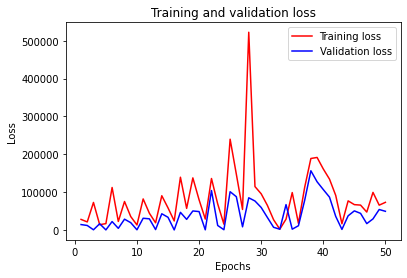

In [73]:
""" Part 1 """
# Extract the loss and validation loss from the history object
loss = history_No_DO.history['loss']
val_loss = history_No_DO.history['val_loss']

# Create a line plot with validation loss and training loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

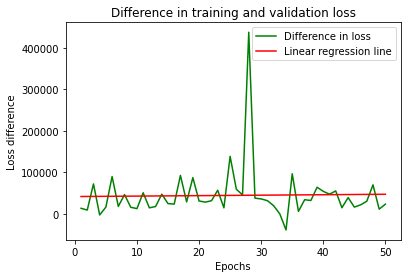

In [74]:
# Calculate the difference between training and validation loss
diff_loss__No_DO = [loss[i]-val_loss[i] for i in range(len(loss))]

# Fit a linear regression line to the difference in loss
x = np.array(epochs)
y = np.array(diff_loss__No_DO)

m, b = np.polyfit(x, y, 1)

# Create a line plot with the difference in loss and linear regression line
plt.plot(epochs, diff_loss__No_DO, 'g', label='Difference in loss')
plt.plot(x, m*x + b, 'r', label='Linear regression line')
plt.title('Difference in training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss difference')
plt.legend()
plt.show()

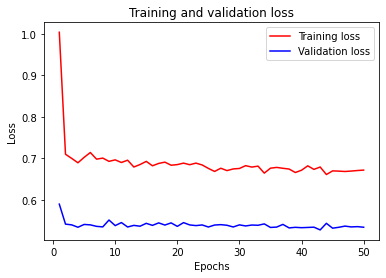

In [75]:
""" Part 2 """
# Extract the loss and validation loss from the history object
loss = history_DO.history['loss']
val_loss = history_DO.history['val_loss']

# Create a line plot with validation loss and training loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

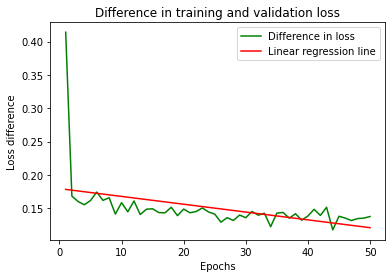

In [76]:
# Calculate the difference between training and validation loss
diff_loss_Do = [loss[i]-val_loss[i] for i in range(len(loss))]

# Fit a linear regression line to the difference in loss
x = np.array(epochs)
y = np.array(diff_loss_Do)

m, b = np.polyfit(x, y, 1)

# Create a line plot with the difference in loss and linear regression line
plt.plot(epochs, diff_loss_Do, 'g', label='Difference in loss')
plt.plot(x, m*x + b, 'r', label='Linear regression line')
plt.title('Difference in training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss difference')
plt.legend()
plt.show()

# Phase 2 : Effect of Learning rate on model performance 

In [ ]:
Part 1 : With low learning rate

In [60]:
from tensorflow.keras.optimizers import Adam

# Define the model architecture using Sequential model
model_lowLR = tf.keras.models.Sequential()
# Taking 50 units with 2 hidden layers
#model_lowLR.add(tf.keras.layers.Dense(200, activation='relu', input_dim=X_train.shape[1]))
model_lowLR.add(tf.keras.layers.Dense(100, activation='relu',input_dim=X_train.shape[1]))
model_lowLR.add(tf.keras.layers.Dense(75, activation='relu'))
model_lowLR.add(tf.keras.layers.Dense(55, activation='relu'))
model_lowLR.add(tf.keras.layers.Dense(25, activation='relu'))
model_lowLR.add(tf.keras.layers.Dense(3, activation='softmax'))

# Adding a low learning rate of 0.001%
optimizer = Adam(learning_rate=0.001)


# Compile the model
model_lowLR.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history_lowLR = model_lowLR.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
18/18 [==============================] - 2s 39ms/step - loss: 1279.0199 - accuracy: 0.6470 - val_loss: 74.5323 - val_accuracy: 0.7569
Epoch 2/50
18/18 [==============================] - 0s 11ms/step - loss: 11202.2393 - accuracy: 0.6539 - val_loss: 5219.7397 - val_accuracy: 0.2014
Epoch 3/50
18/18 [==============================] - 0s 15ms/step - loss: 11427.9727 - accuracy: 0.2435 - val_loss: 6539.7222 - val_accuracy: 0.2014
Epoch 4/50
18/18 [==============================] - 0s 15ms/step - loss: 3827.2234 - accuracy: 0.4626 - val_loss: 787.5065 - val_accuracy: 0.8056
Epoch 5/50
18/18 [==============================] - 0s 14ms/step - loss: 42633.2539 - accuracy: 0.3635 - val_loss: 8054.3994 - val_accuracy: 0.2014
Epoch 6/50
18/18 [==============================] - 0s 11ms/step - loss: 10280.1865 - accuracy: 0.2452 - val_loss: 2954.4873 - val_accuracy: 0.2014
Epoch 7/50
18/18 [==============================] - 0s 19ms/step - loss: 36846.8281 - accuracy: 0.6017 - val_loss: 38

Part 2 : With high learning rate

In [61]:
# Define the model architecture using Sequential model
model_HighLR = tf.keras.models.Sequential()
# Taking 50 units with 2 hidden layers
#model_lowLR.add(tf.keras.layers.Dense(200, activation='relu', input_dim=X_train.shape[1]))
model_HighLR.add(tf.keras.layers.Dense(100, activation='relu',input_dim=X_train.shape[1]))
model_HighLR.add(tf.keras.layers.Dense(75, activation='relu'))
model_HighLR.add(tf.keras.layers.Dense(55, activation='relu'))
model_HighLR.add(tf.keras.layers.Dense(25, activation='relu'))
model_HighLR.add(tf.keras.layers.Dense(3, activation='softmax'))

# Adding a high learning rate of 1
optimizer = Adam(learning_rate=1)


# Compile the model
model_HighLR.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history_highLR = model_HighLR.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
18/18 [==============================] - 2s 40ms/step - loss: 118474696.0000 - accuracy: 0.5148 - val_loss: 92355176.0000 - val_accuracy: 0.1875
Epoch 2/50
18/18 [==============================] - 0s 13ms/step - loss: 81353464.0000 - accuracy: 0.5478 - val_loss: 25.9994 - val_accuracy: 0.8056
Epoch 3/50
18/18 [==============================] - 0s 9ms/step - loss: 10.7357 - accuracy: 0.7304 - val_loss: 1.8099 - val_accuracy: 0.8056
Epoch 4/50
18/18 [==============================] - 0s 12ms/step - loss: 1.4270 - accuracy: 0.5583 - val_loss: 0.5824 - val_accuracy: 0.8056
Epoch 5/50
18/18 [==============================] - 0s 12ms/step - loss: 0.9112 - accuracy: 0.6696 - val_loss: 0.6425 - val_accuracy: 0.8056
Epoch 6/50
18/18 [==============================] - 0s 10ms/step - loss: 0.7264 - accuracy: 0.7304 - val_loss: 0.6130 - val_accuracy: 0.8056
Epoch 7/50
18/18 [==============================] - 0s 11ms/step - loss: 0.6886 - accuracy: 0.7304 - val_loss: 0.6294 - val_accurac

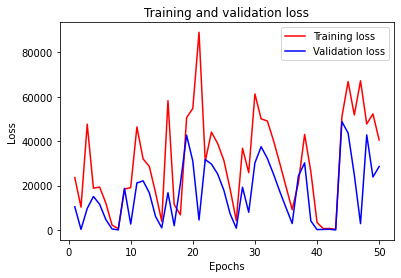

In [83]:
""" Part 1 """
# Extract the loss and validation loss from the history object
loss = history_lowLR.history['loss']
val_loss = history_lowLR.history['val_loss']

# Create a line plot with validation loss and training loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Since the curves are highly variable, it may indicate that the training process is unstable or that the model is highly sensitive to the initial conditions

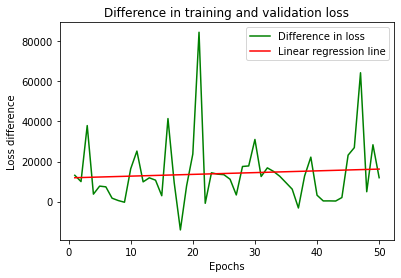

In [84]:
import numpy as np


# Calculate the difference between training and validation loss
diff_loss_lowLR = [loss[i]-val_loss[i] for i in range(len(loss))]

# Fit a linear regression line to the difference in loss
x = np.array(epochs)
y = np.array(diff_loss_lowLR)

m, b = np.polyfit(x, y, 1)

# Create a line plot with the difference in loss and linear regression line
plt.plot(epochs, diff_loss_lowLR, 'g', label='Difference in loss')
plt.plot(x, m*x + b, 'r', label='Linear regression line')
plt.title('Difference in training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss difference')
plt.legend()
plt.show()

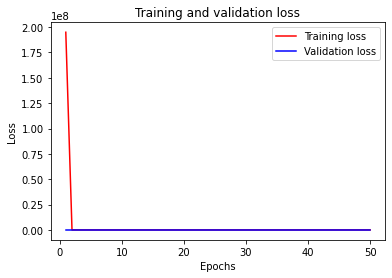

In [85]:
""" Part 2 """
# Extract the loss and validation loss from the history object
loss = history_highLR.history['loss']
val_loss = history_highLR.history['val_loss']

# Create a line plot with validation loss and training loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Scale the y-axis
#plt.ylim(0, 1)

plt.show()

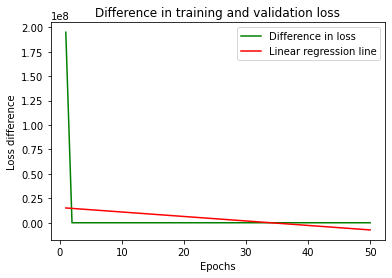

In [86]:
# Calculate the difference between training and validation loss
diff_loss_highLR = [loss[i]-val_loss[i] for i in range(len(loss))]

# Fit a linear regression line to the difference in loss
x = np.array(epochs)
y = np.array(diff_loss_highLR)

m, b = np.polyfit(x, y, 1)

# Create a line plot with the difference in loss and linear regression line
plt.plot(epochs, diff_loss_highLR, 'g', label='Difference in loss')
plt.plot(x, m*x + b, 'r', label='Linear regression line')
plt.title('Difference in training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss difference')
plt.legend()
plt.show()

Explanation :  
A steep slope in the loss curves indicates that the model is learning quickly since the learning rate is set to 1

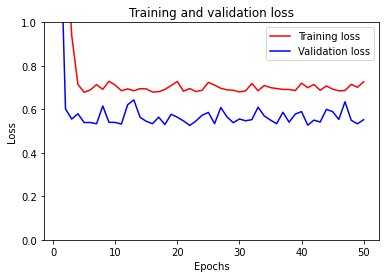

In [64]:
""" Part 2 Revision """
# Extract the loss and validation loss from the history object
loss = history_highLR.history['loss']
val_loss = history_highLR.history['val_loss']

# Create a line plot with validation loss and training loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Scale the y-axis
plt.ylim(0, 1)

plt.show()

The loss curves are, for the most part, consistent from epoch to epoch